In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Business Objective

Objective

The objective of this project is to build a predictive model that forecasts the demand for shared bikes in the American market, based on several influential factors. BoomBikes, a leading bike-sharing provider, has faced significant challenges due to the ongoing pandemic and aims to use data to understand and adapt to changing customer needs. By analyzing historical bike usage data, the company seeks to identify key variables—such as weather, temperature, day of the week, and season—that impact bike demand.

Using linear regression, this project will explore how these factors affect demand and help predict future trends. The goal is to understand which variables are most significant in explaining fluctuations in bike usage and how they interact. This will allow BoomBikes to optimize operations, adjust fleet distribution, pricing strategies, and better align marketing efforts with expected demand.

In summary, the project aims to provide BoomBikes with a data-driven approach to predict bike demand, enabling them to make informed decisions and respond effectively to market conditions. By understanding demand dynamics, BoomBikes can improve customer satisfaction, maximize efficiency, and strengthen its position in the competitive bike-sharing market as the economy recovers.

# Data Loading

Loading the Data

Loading the data which contains information regarding the Bike Sharing events in the years 2018 and 2019.

In [22]:
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [23]:
df.shape

(730, 16)

In [24]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Data Handling

> Checking and handling missing values

> Checking duplicates

> Checking columns and their datatypes

Checking and handling missing values

In [25]:
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


There are no missing values in the dataset.

Checking duplicates

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
df.shape

(730, 16)

There are no duplicate values in dataset.

Checking columns and their data types

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


It appears like there are some categorical columns having int/float datatypes.

In [29]:
df[['instant','dteday','season','yr','mnth','holiday','weekday','workingday','weathersit','casual','registered','cnt']].head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,41,1280,1321


Removing redundant columns -

1. instant : It is just the record number so it can be removed as it does not carry specific information.

2. dteday : Since we already have the yr and mnth we do not need this date column.

3. casual , registered : our objective is to find the total count of bikes rented which is the 'cnt' column and not any specific category , so we can remove the 2 columns.

In [30]:
df.drop(columns=['instant','dteday','casual','registered'],inplace=True)
df.shape

(730, 12)

Column 'cnt' is our target variable.

Checking frequencies of different categorical columns.

In [31]:
for column in ['season','weathersit','weekday','mnth','yr']:
  print(df[column].value_counts())
  print("--"*50)

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
weathersit
1    463
2    246
3     21
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
yr
0    365
1    365
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


Converting categorical columns that had numerical datatype into datatype 'category'.

In [32]:
df['season']=df['season'].astype('category')
df['weathersit']=df['weathersit'].astype('category')
df['mnth']=df['mnth'].astype('category')
df['weekday']=df['weekday'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


# Exploratory Data Analysis

In [33]:
num_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()
binary_num_columns=['yr','holiday','workingday']
num_columns=[numcol for numcol in num_columns if numcol not in binary_num_columns]
print(num_columns)
print(binary_num_columns)

['temp', 'atemp', 'hum', 'windspeed', 'cnt']
['yr', 'holiday', 'workingday']


Visualizing Numerical Variables

Visualizing pairplots for the numerical variables 'temp', 'atemp', 'hum', 'windspeed', 'cnt' to understand their nature and explore if any relation exists among them.

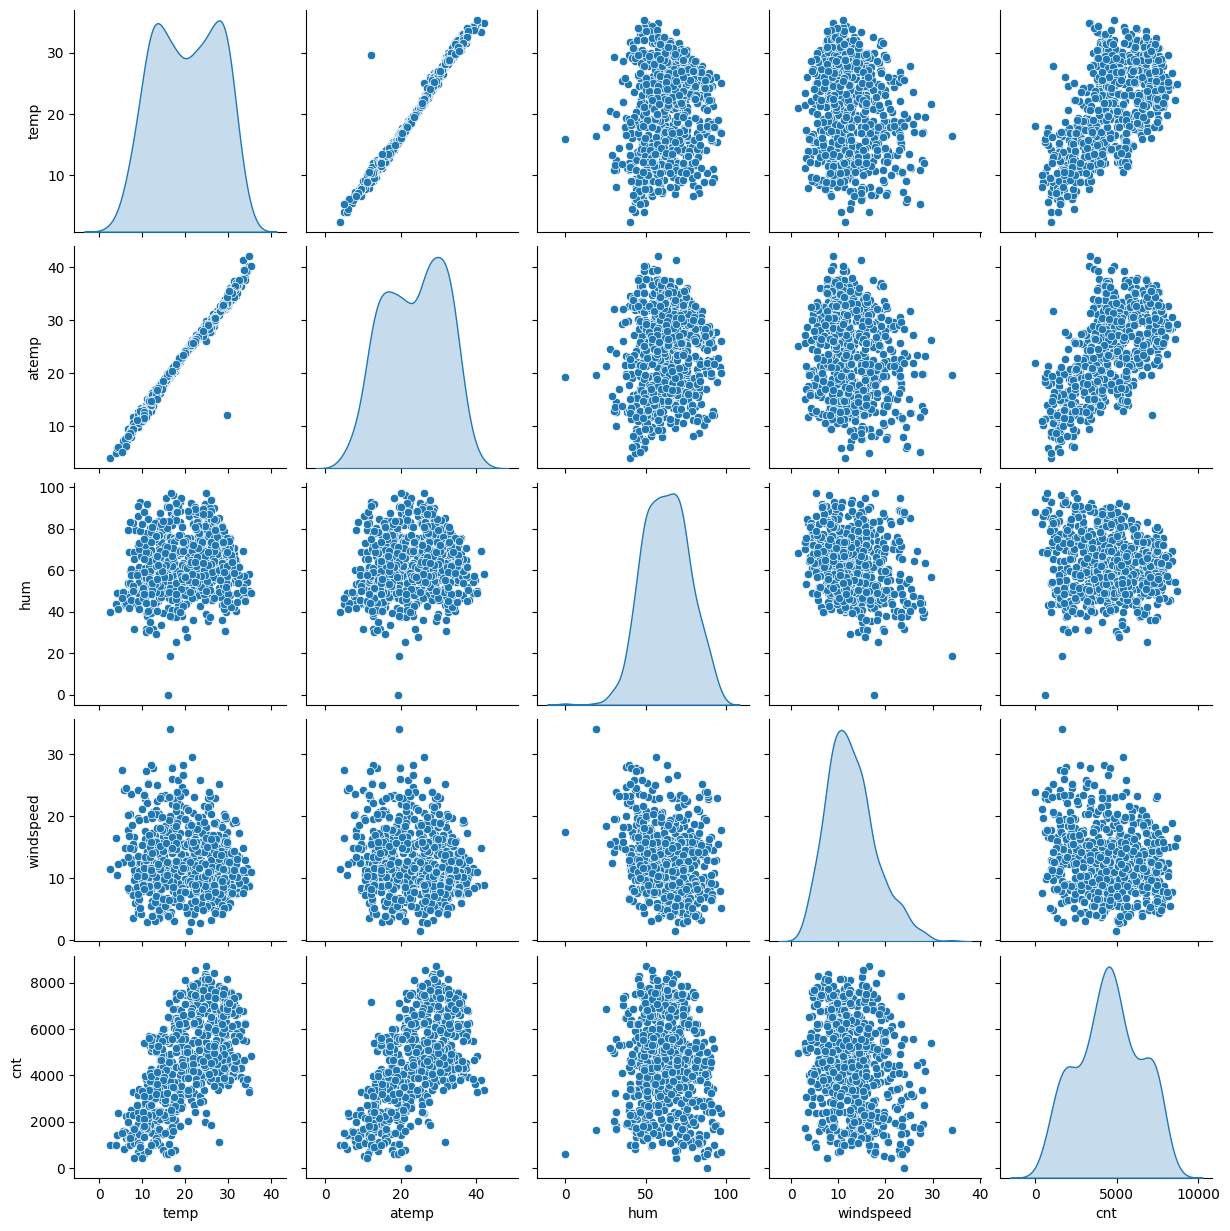

In [34]:
sns.pairplot(df[num_columns],diag_kind='kde')
plt.show()

Insights

- cnt, temp, atemp have linear relationship with each other.
- temp and atemp not only have linear relation with target variable cnt but they also have linear relationship with each other. So, for model building we cannot use both temp and atemp, we have to pick one to avoid multicollinearity.

Visualizing Categorical Variables

Visualizing barplots for 'yr', 'holiday', 'workingday'.

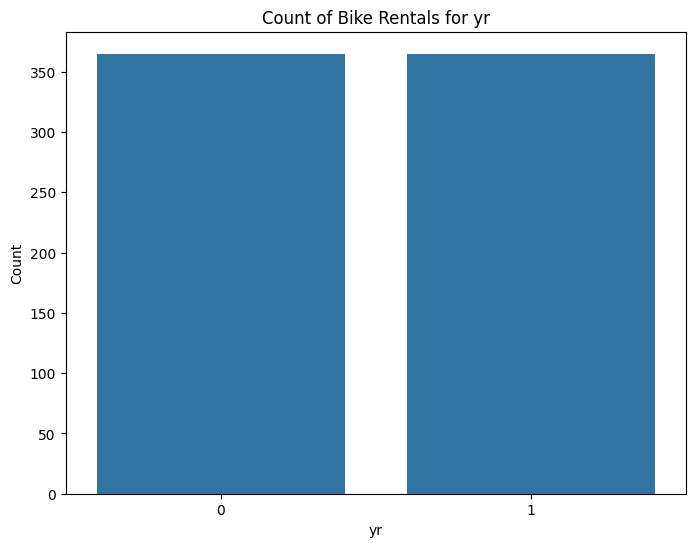

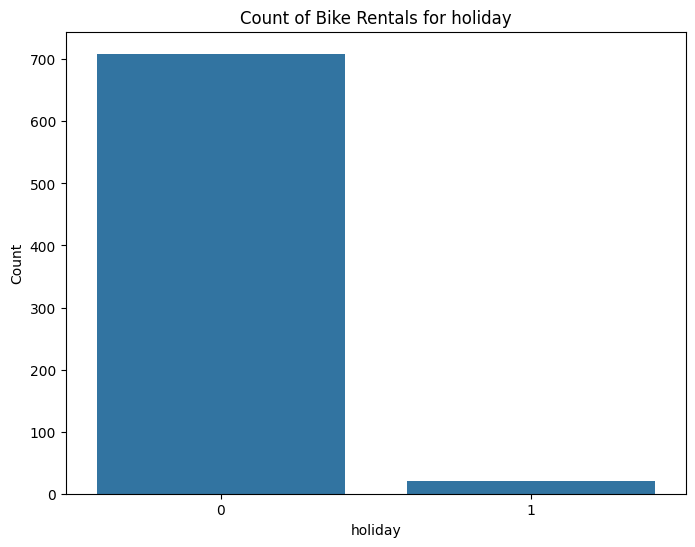

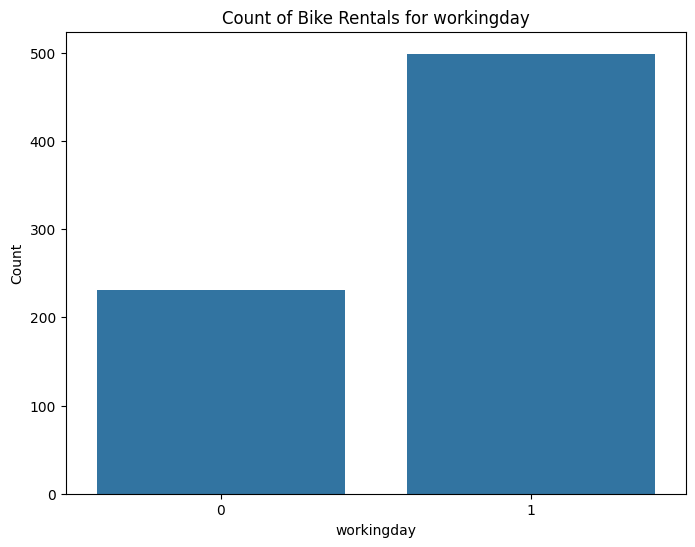

In [35]:
for column in binary_num_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Count of Bike Rentals for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    #plt.xticks(rotation=45)
    plt.show()

The number of records for workingdays are higher than non working day. The number of records for holidays are quite lesser than non holidays.

Visualizing boxplots of target variable cnt against the binary categories 0 and 1 of the columns 'yr', 'holiday', 'workingday' to understand the behavior of bike bookings with respect to these categories.

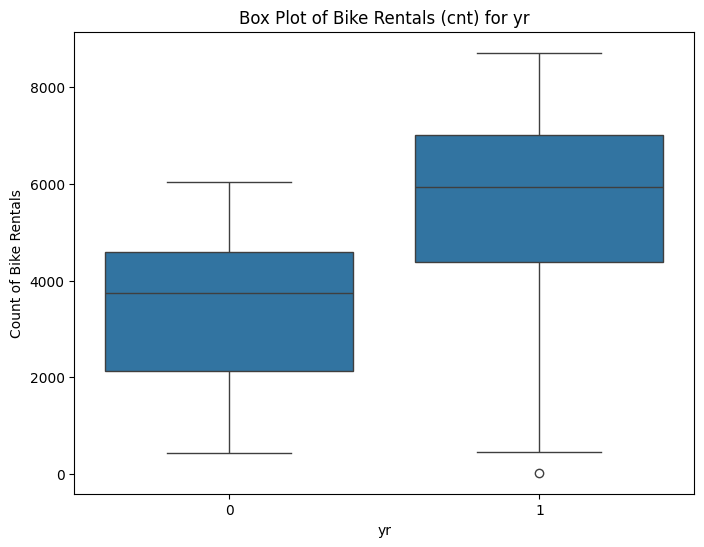

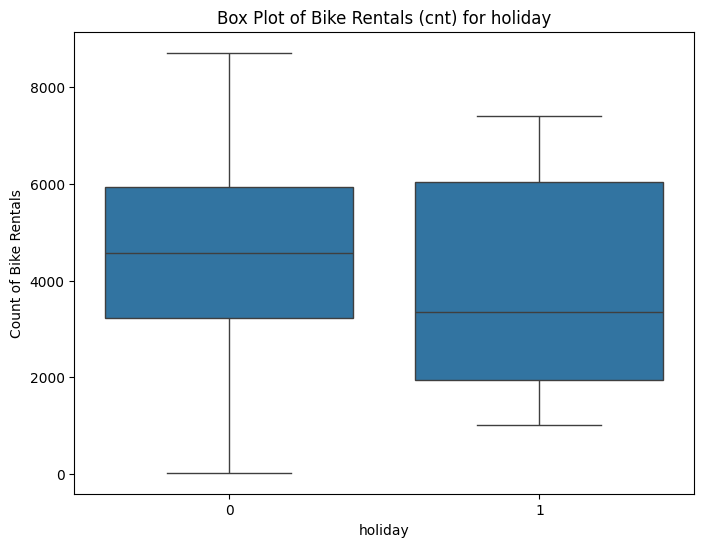

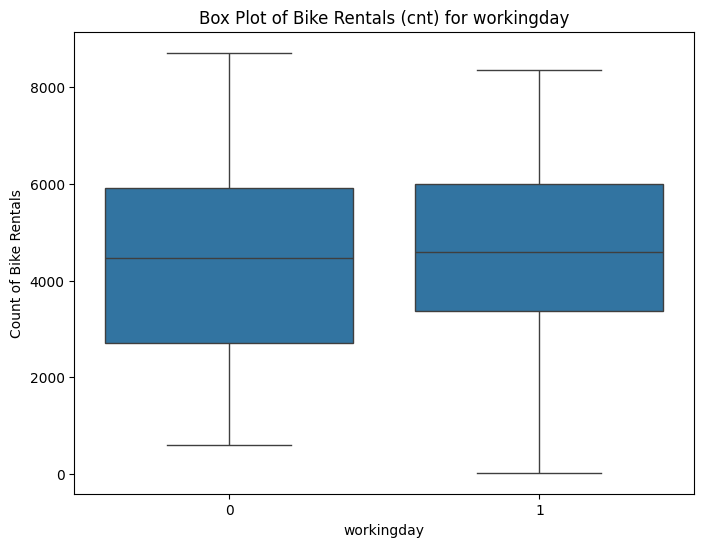

In [36]:
for column in binary_num_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=column, y='cnt')
    plt.title(f'Box Plot of Bike Rentals (cnt) for {column}')
    plt.xlabel(column)
    plt.ylabel('Count of Bike Rentals')
    #plt.xticks(rotation=45)
    plt.show()

Insights

- The bike bookings are more in yr value 1 (2019) than yr value 0 (2018). This means the bike sharing company is making good progress in their business.
- The median bike bookings on holidays appears to be lower than on non-holidays.Bike bookings on holidays have wide interquartile range with few extreme values, and overall lower bike demands.
- The bike bookings on working days and non working days are quite similar overall. However, working days tend to have higher bookings at the lower end of the distribution than non working days.

In [37]:
categorical_columns=df.select_dtypes(include=['category','object']).columns.tolist()
print(categorical_columns)

['season', 'mnth', 'weekday', 'weathersit']


Visualizing barplots for 'season', 'mnth', 'weekday', 'weathersit'.

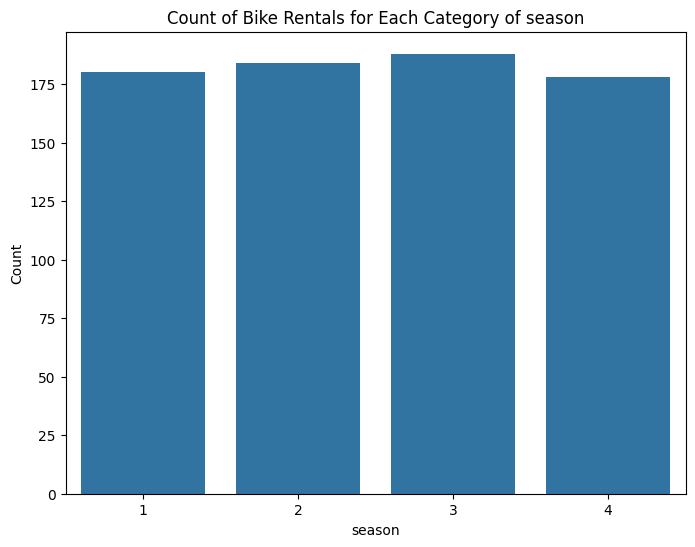

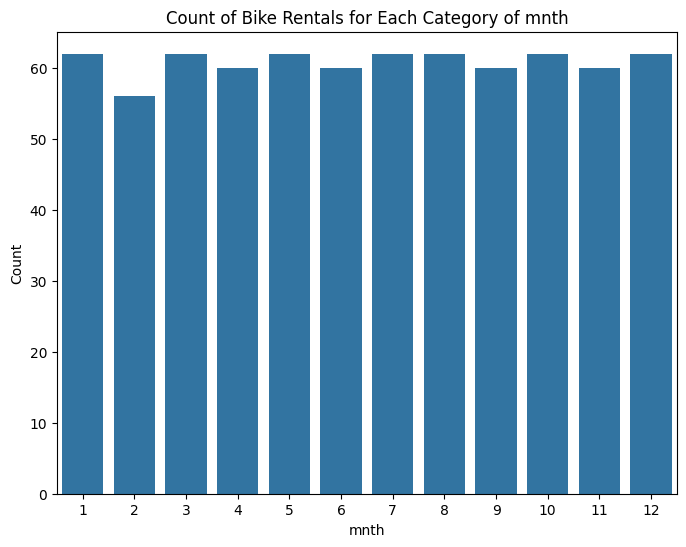

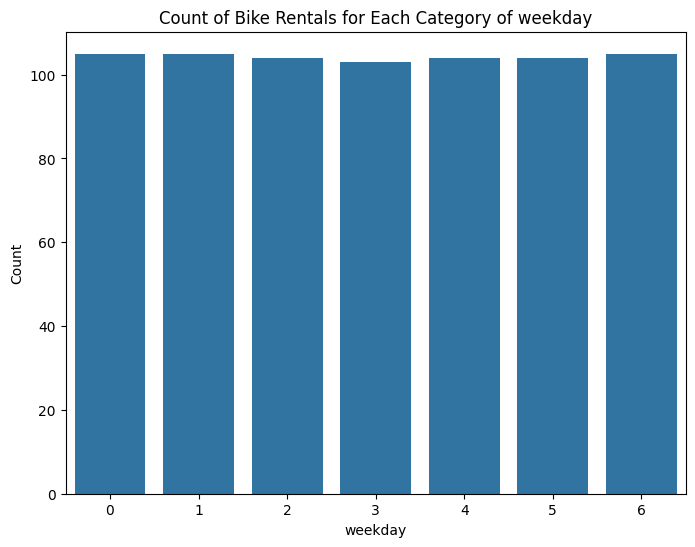

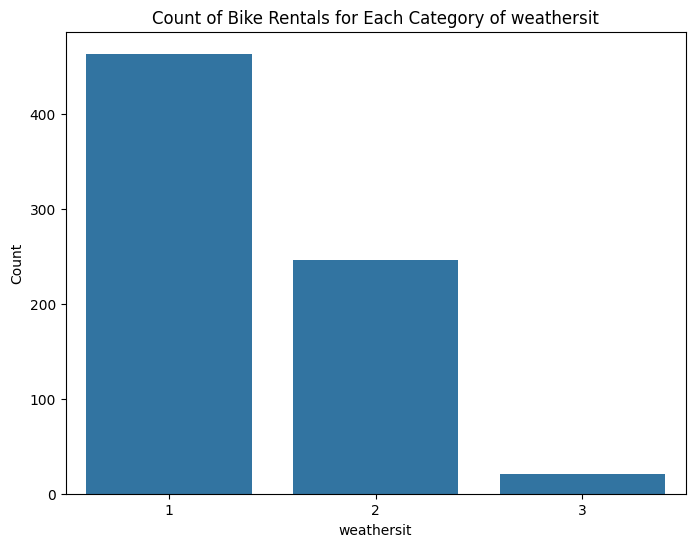

In [38]:
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Count of Bike Rentals for Each Category of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    #plt.xticks(rotation=45)
    plt.show()

The records for weathersit 1 (Clear, Few clouds, Partly cloudy, Partly cloudy) are highest followed by weathersit 2 (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist) and weathersit 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds).

Visualizing boxplots of target variable cnt against the categories of the columns 'season', 'mnth', 'weekday', 'weathersit' to understand the beavior of bike bookings with respect to these categories.

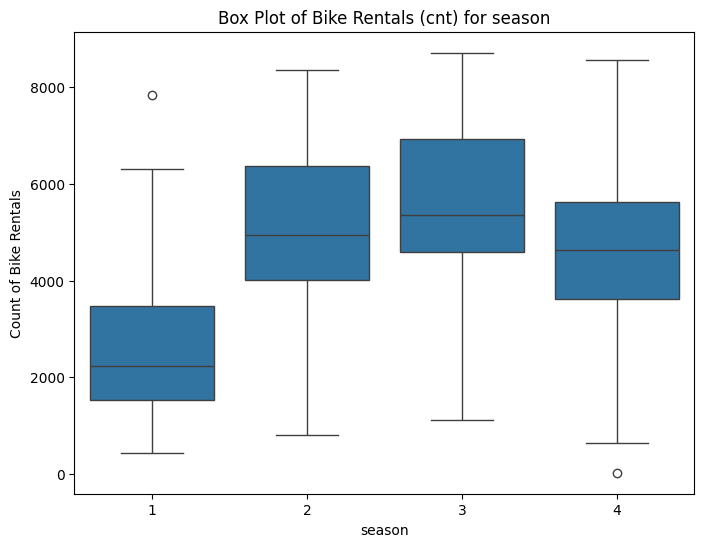

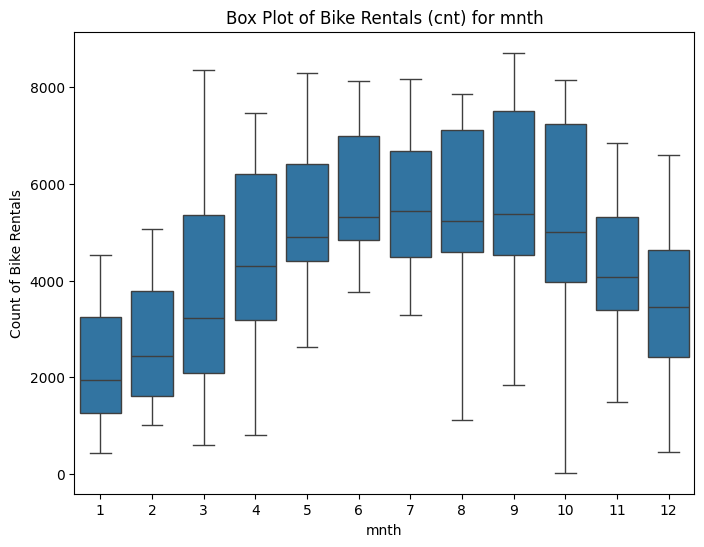

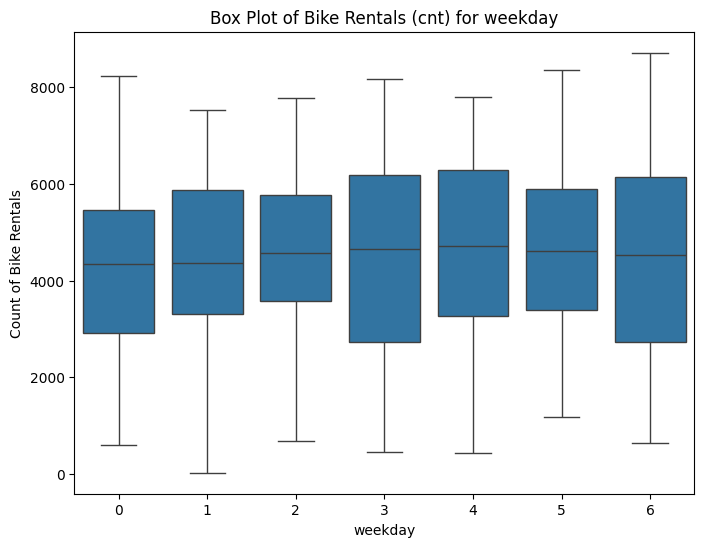

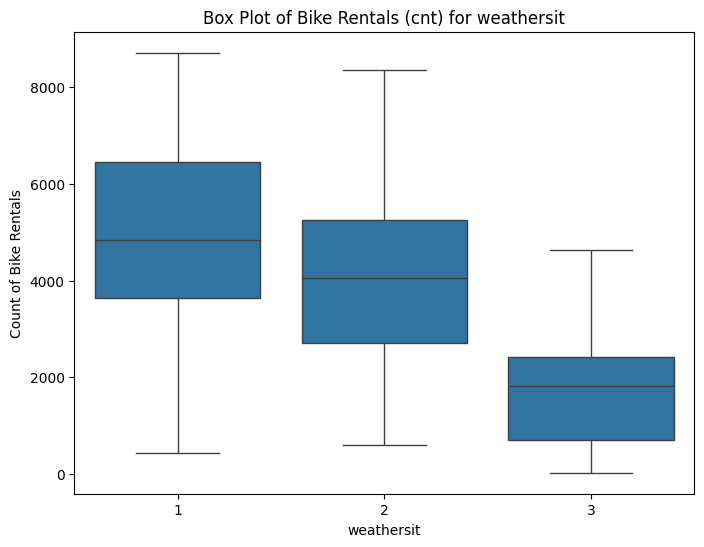

In [39]:
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=column, y='cnt')
    plt.title(f'Box Plot of Bike Rentals (cnt) for {column}')
    plt.xlabel(column)
    plt.ylabel('Count of Bike Rentals')
    #plt.xticks(rotation=45)
    plt.show()

Insights

- season 3 (Fall) has clearly attracted the highest number of bike bookings compared to other seasons.
- Bike bookings rise from the starting months , tend to peak in the middle months of the year, with particularly high demand during the months mnth 6 (june), mnth 7 (july), mnth 8 (august), mnth 9 (september), mnth 10 (october) and then gradually decrease.
- weekday 5, weekday 6 attract slightly higher bike bookings than rest of teh days.
- weathersit 1 (clear/partly cloudy) attracted highest bike bookings followed by weathersit 2 (misty/cloudy) with the lowest bike bookings in weathersit 3 (snow/rain/thunderstorm). It is natural that people prefer clear weather conditions for outdoor activities like biking.

# Data Preparation

> Creating Dummy Variables For Categorical Columns

> Splitting data in train and test sets

> Rescaling

Creating dummy variables for categorical columns for model to understand and learn.

In [40]:
df = pd.get_dummies(df, drop_first=True,dtype='uint8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [41]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


Splitting Data in Train and Test Sets

In [42]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=300)

# Output the shapes of the resulting sets
print("x_train shape:", df_train.shape)
print("x_test shape:", df_test.shape)

x_train shape: (510, 30)
x_test shape: (219, 30)


ReScaling

Rescaling numerical variables of varying ranges and magnitudes in a consistent magnitude scale so that model treats all variables impartially and equally. Scaling values in range of 0 and 1 using MinMaxScaler().

In [43]:
num_columns

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [44]:
scaler=MinMaxScaler()

In [45]:
df_train[num_columns] = scaler.fit_transform(df_train[num_columns])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
337,0,0,0,0.350567,0.361341,0.799484,0.146877,0.398412,0,0,...,0,1,0,0,0,0,0,0,0,0
547,1,0,1,0.932261,0.833624,0.460712,0.412422,0.713875,0,1,...,0,0,1,0,0,0,0,0,0,0
626,1,0,1,0.636576,0.617334,0.553027,0.459915,0.870801,0,1,...,0,0,0,0,1,0,0,0,0,0
309,0,0,0,0.373147,0.379082,0.756977,0.166191,0.417280,0,0,...,1,0,0,0,0,0,0,0,0,0
561,1,0,1,0.908606,0.863180,0.664663,0.338275,0.783249,0,1,...,0,0,1,0,0,0,0,0,0,0


Checking correlation matrix

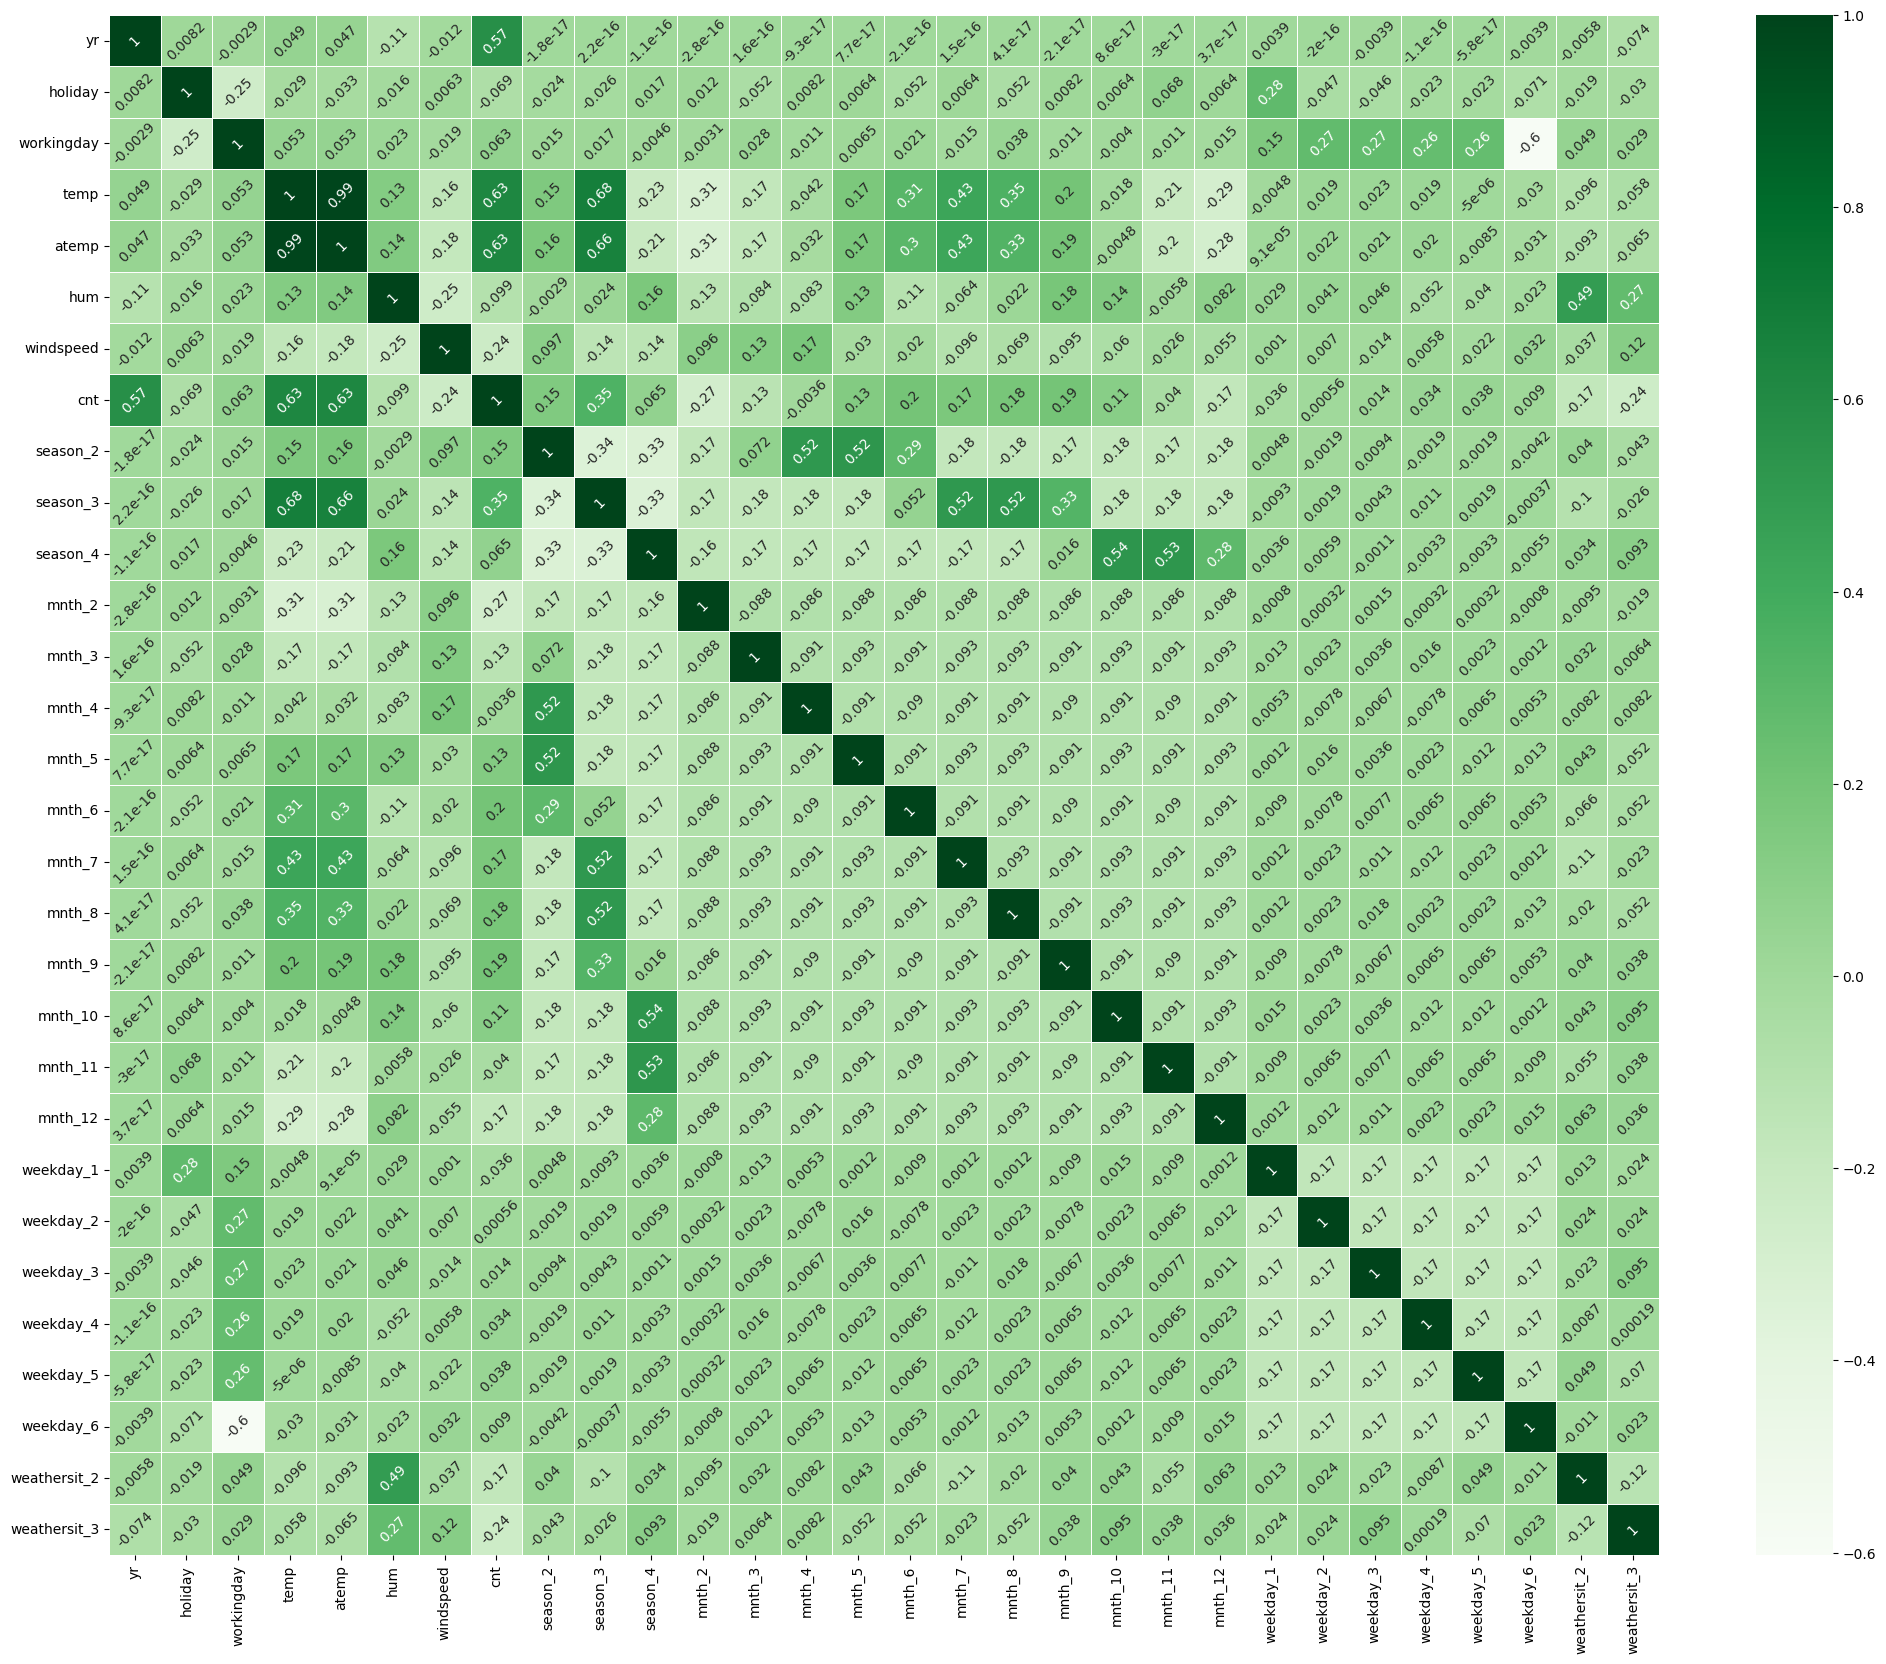

In [46]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True,cmap='Greens',annot_kws={'rotation': 45},linecolor='white', linewidth=0.5)
plt.show()

# Building Model

> Dividing X and Y sets

> Coarse Tuning with RFE

> Fine Tuning with Stats Model and VIF checking

Dividing into X and Y sets for the model building

In [47]:
# y_train=df_train.pop('cnt')
# x_train=df_train
x_train = df_train.copy()
y_train = x_train.pop('cnt')
print(y_train.shape)
print(x_train.shape)

(510,)
(510, 29)


Coarse Tuning by RFE

Picking top 15 features

In [48]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(x_train, y_train)

In [49]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 10),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 6),
 ('mnth_3', False, 2),
 ('mnth_4', False, 5),
 ('mnth_5', True, 1),
 ('mnth_6', False, 4),
 ('mnth_7', False, 8),
 ('mnth_8', False, 3),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 14),
 ('mnth_12', False, 15),
 ('weekday_1', False, 7),
 ('weekday_2', False, 13),
 ('weekday_3', False, 12),
 ('weekday_4', False, 11),
 ('weekday_5', False, 9),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [50]:
x_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [51]:
selected_cols=x_train.columns[rfe.support_]
selected_cols

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_5', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

Checking correlation matrix for the selected features

In [52]:
correlation_cols=['cnt']
correlation_cols.extend(selected_cols)
correlation_cols

['cnt',
 'yr',
 'workingday',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'season_2',
 'season_3',
 'season_4',
 'mnth_5',
 'mnth_9',
 'mnth_10',
 'weekday_6',
 'weathersit_2',
 'weathersit_3']

In [53]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

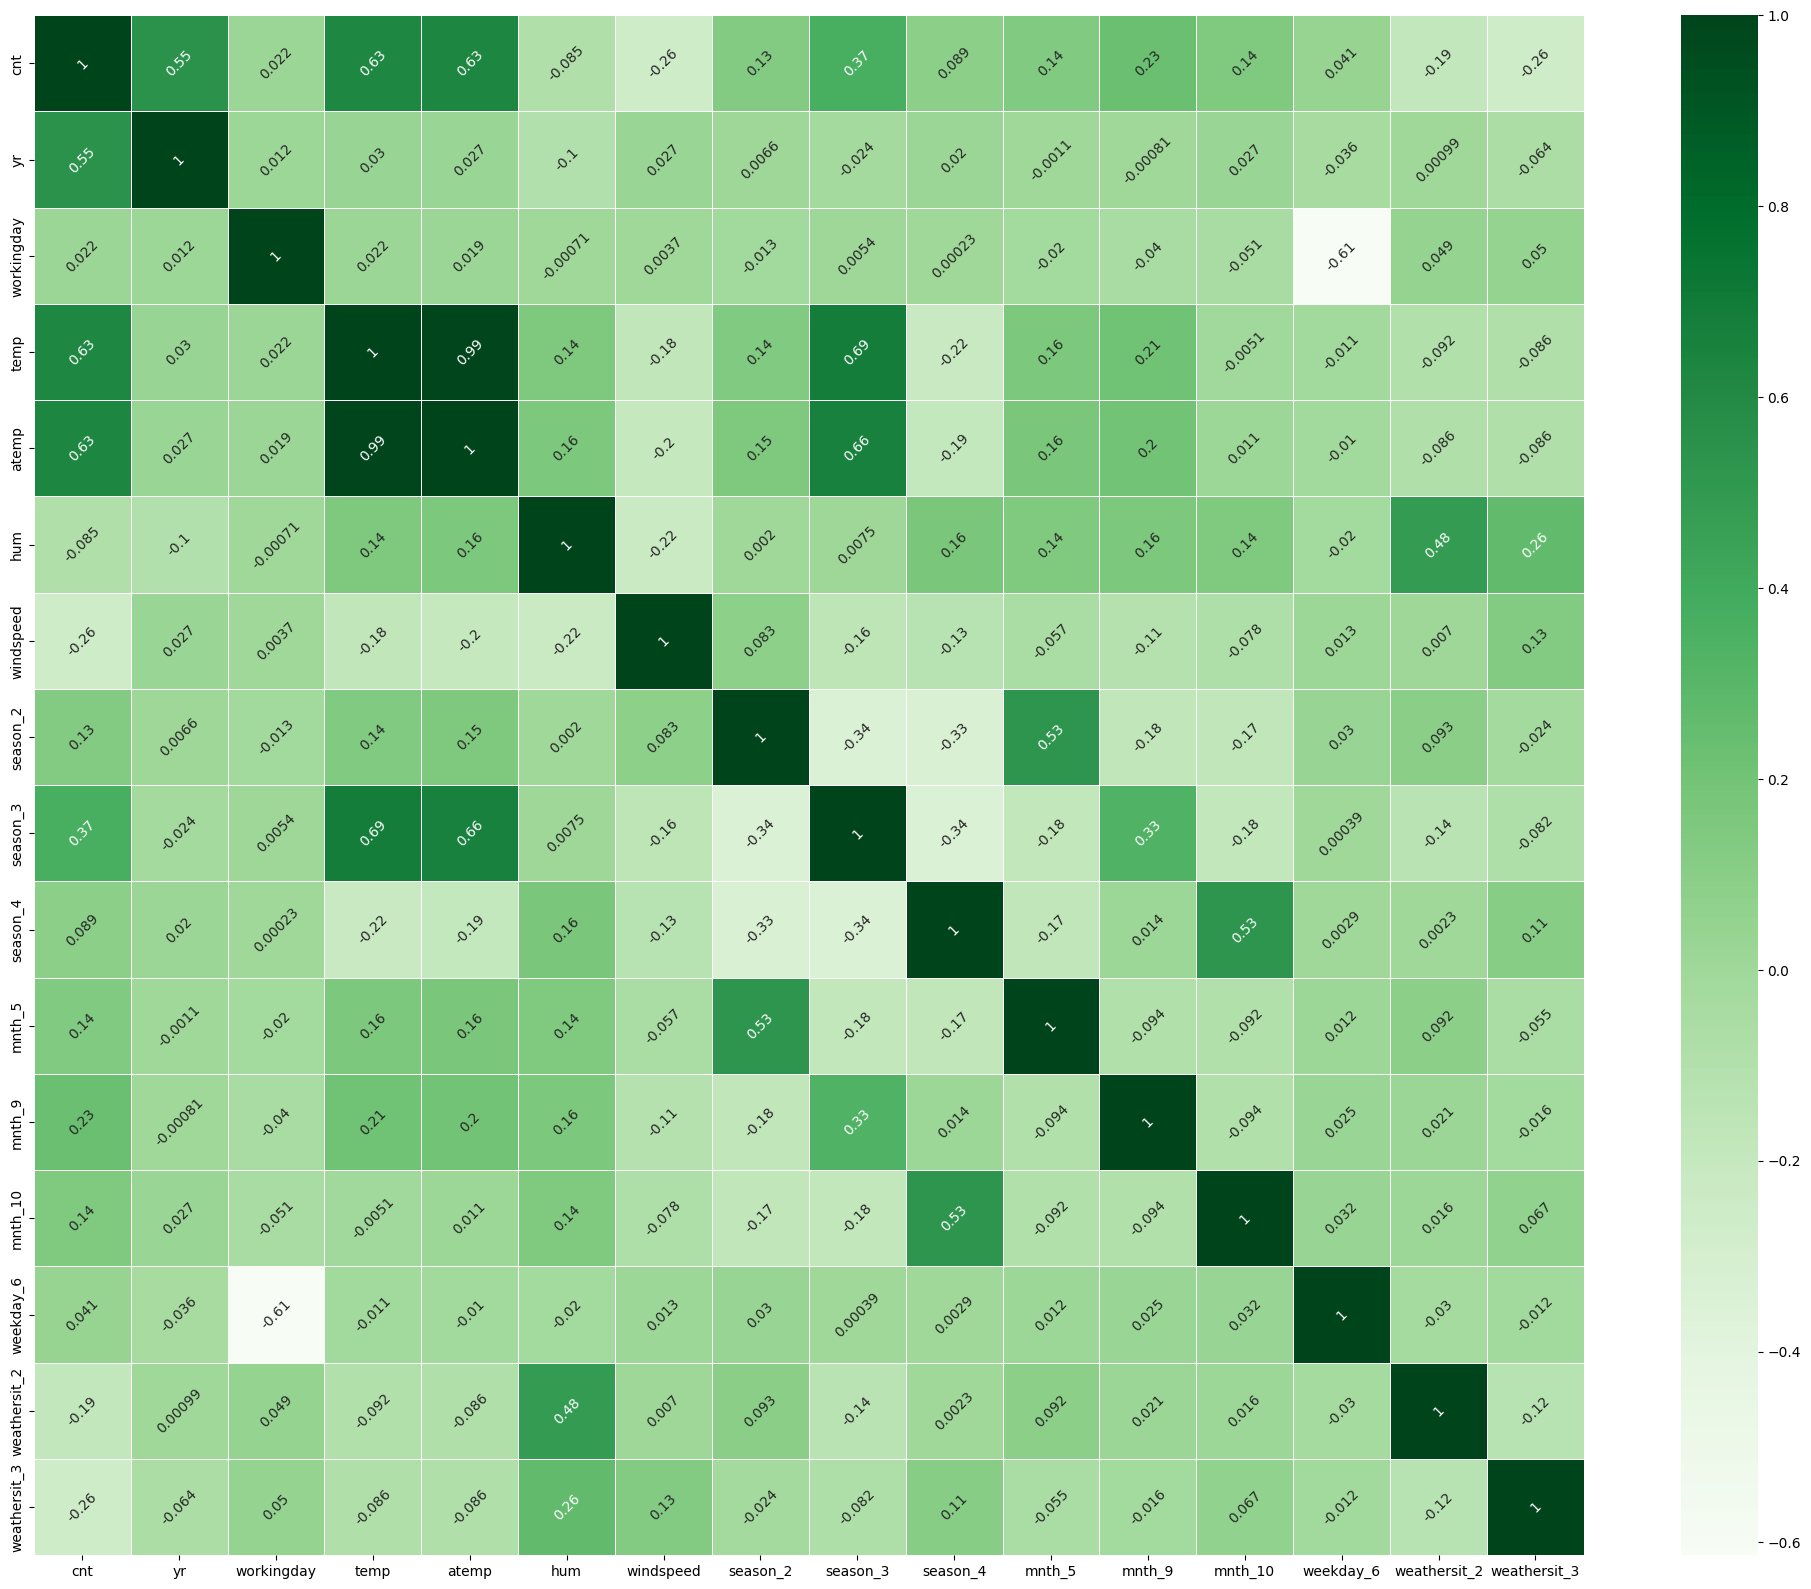

In [54]:
dfcorr=df_train[correlation_cols]
plt.figure(figsize=(25,20))
sns.heatmap(dfcorr.corr(),annot=True,cmap='Greens',annot_kws={'rotation': 45},linecolor='white', linewidth=0.5)
plt.show()

Fine tuning

Creating 2 functions for model building using stats model and VIF calculation

In [55]:
# function to build statsmodel adn print summary

def build_stats_model(trainlabels,traindata):
  traindata=sm.add_constant(traindata)
  lm=sm.OLS(trainlabels,traindata).fit()
  print(lm.summary())
  return lm,traindata


In [56]:
# function to calculate VIF

def calc_vif(traindata):
  vif = pd.DataFrame()
  X = traindata
  vif['Features'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  print(vif)



Model 1

Building model using statsmodel, for the detailed statistics

In [57]:
x_train_rfe=x_train[selected_cols]

In [58]:
lm1,x_train_rfe_const=build_stats_model(y_train,x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     200.6
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          5.63e-199
Time:                        18:50:57   Log-Likelihood:                 542.00
No. Observations:                 510   AIC:                            -1052.
Df Residuals:                     494   BIC:                            -984.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2045      0.028      7.432   

In [59]:
calc_vif(x_train_rfe)

        Features     VIF
2           temp  379.88
3          atemp  361.69
4            hum   17.40
7       season_3    7.40
5      windspeed    4.93
1     workingday    4.58
6       season_2    3.85
8       season_4    2.97
13  weathersit_2    2.10
0             yr    1.94
12     weekday_6    1.77
11       mnth_10    1.64
9         mnth_5    1.62
10        mnth_9    1.31
14  weathersit_3    1.21


atemp has very high p value , implying it is insignificant and very high VIF implying it is multicollinear. Hence dropping atemp and rebuilding model.

Model 2

In [60]:
x_train_rfe_2=x_train_rfe.drop(['atemp'],axis=1)

rebuilding model

In [61]:
lm2,x_train_rfe_2_const=build_stats_model(y_train,x_train_rfe_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     215.3
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          4.00e-200
Time:                        18:50:57   Log-Likelihood:                 541.94
No. Observations:                 510   AIC:                            -1054.
Df Residuals:                     495   BIC:                            -990.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2049      0.027      7.455   

In [62]:
calc_vif(x_train_rfe_2)

        Features    VIF
2           temp  24.16
3            hum  17.02
6       season_3   7.35
4      windspeed   4.79
1     workingday   4.58
5       season_2   3.84
7       season_4   2.96
12  weathersit_2   2.10
0             yr   1.94
11     weekday_6   1.77
10       mnth_10   1.64
8         mnth_5   1.62
9         mnth_9   1.31
13  weathersit_3   1.21


temp and hum have high VIFs. But we saw from the pairplots that temp is showing clear linear relation with target variable and it is an important feature from business perspective. Since hum has very high VIF, we drop it.

Model 3

In [63]:
x_train_rfe_3=x_train_rfe_2.drop(['hum'],axis=1)

Rebuilding

In [64]:
lm3,x_train_rfe_3_const=build_stats_model(y_train,x_train_rfe_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     221.6
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          5.77e-197
Time:                        18:50:57   Log-Likelihood:                 531.60
No. Observations:                 510   AIC:                            -1035.
Df Residuals:                     496   BIC:                            -975.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1105      0.018      6.056   

In [65]:
calc_vif(x_train_rfe_3)

        Features    VIF
2           temp  17.89
5       season_3   7.09
3      windspeed   4.40
1     workingday   4.19
4       season_2   3.78
6       season_4   2.86
0             yr   1.94
10     weekday_6   1.67
9        mnth_10   1.63
7         mnth_5   1.61
11  weathersit_2   1.52
8         mnth_9   1.30
12  weathersit_3   1.10


mnth_5 has high p value, temp and season_3 have high VIF. We will drop mnth_5 first as it is clearly an insiginifiant feature and then rebuild the model.

Model 4

In [66]:
x_train_rfe_4=x_train_rfe_3.drop(['mnth_5'],axis=1)

In [67]:
lm4,x_train_rfe_4_const=build_stats_model(y_train,x_train_rfe_4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     238.9
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          1.63e-197
Time:                        18:50:57   Log-Likelihood:                 530.06
No. Observations:                 510   AIC:                            -1034.
Df Residuals:                     497   BIC:                            -979.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1098      0.018      6.008   

In [68]:
calc_vif(x_train_rfe_4)

        Features    VIF
2           temp  17.18
5       season_3   6.91
3      windspeed   4.30
1     workingday   4.19
4       season_2   3.53
6       season_4   2.84
0             yr   1.94
9      weekday_6   1.67
8        mnth_10   1.63
10  weathersit_2   1.51
7         mnth_9   1.30
11  weathersit_3   1.10


temp has the highest VIF. But in the data analysis section pair plots, we found that temp is very much linearly related with cnt. So let us keep temp and remove season_3 having second highest VIF.

Model 5

In [69]:
x_train_rfe_5=x_train_rfe_4.drop(['season_3'],axis=1)

In [70]:
lm5,x_train_rfe_5_const=build_stats_model(y_train,x_train_rfe_5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     246.1
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          2.50e-193
Time:                        18:50:57   Log-Likelihood:                 517.28
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     498   BIC:                            -959.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0940      0.018      5.097   

In [71]:
calc_vif(x_train_rfe_5)

        Features   VIF
2           temp  4.81
1     workingday  4.16
3      windspeed  4.11
5       season_4  1.95
0             yr  1.92
8      weekday_6  1.67
7        mnth_10  1.59
4       season_2  1.58
9   weathersit_2  1.50
6         mnth_9  1.25
10  weathersit_3  1.10


We drop mnth_10 due to the high p value.

Model 6

In [72]:
x_train_rfe_6=x_train_rfe_5.drop(['mnth_10'],axis=1)

In [73]:
lm6,x_train_rfe_6_const=build_stats_model(y_train,x_train_rfe_6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     266.4
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          6.81e-193
Time:                        18:50:58   Log-Likelihood:                 513.35
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     499   BIC:                            -958.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0905      0.019      4.885   

In [74]:
calc_vif(x_train_rfe_6)

       Features   VIF
2          temp  4.68
1    workingday  4.12
3     windspeed  4.10
0            yr  1.92
7     weekday_6  1.66
4      season_2  1.58
8  weathersit_2  1.50
5      season_4  1.42
6        mnth_9  1.21
9  weathersit_3  1.10


We will consider Model 6 for proceeding further as all the predictors have very low p value indicating they are significant. Also, this model shows very low multicollinearity between the predictors as the VIF values of all of them are below the permissible range of 5. The Prob (F-statistic) is also very less indicating that the overall model fit is significant.

In [75]:
x_train_rfe_6_const.head()

,const,yr,workingday,temp,windspeed,season_2,season_4,mnth_9,weekday_6,weathersit_2,weathersit_3
337,1.0,0,0,0.350567,0.146877,0,1,0,0,0,0
547,1.0,1,1,0.932261,0.412422,0,0,0,0,0,0
626,1.0,1,1,0.636576,0.459915,0,0,1,0,0,0
309,1.0,0,0,0.373147,0.166191,0,1,0,0,0,0
561,1.0,1,1,0.908606,0.338275,0,0,0,0,0,0


In [76]:
x_train_rfe_6_const.shape

(510, 11)

In [77]:
y_train.shape

(510,)

# Residual Error Analysis & Other Assumptions Validation

> Independence of Residuals

> Normality of Error Terms

> Homoscedasticity

> Multicollinearity

> Linearity



Independence of residuals

Durbin-Watson value of Model 6 is 2.072, indicating there is no autocorrelation in the residuals.

Normality of Residuals

Text(0.5, 0, 'Residual')

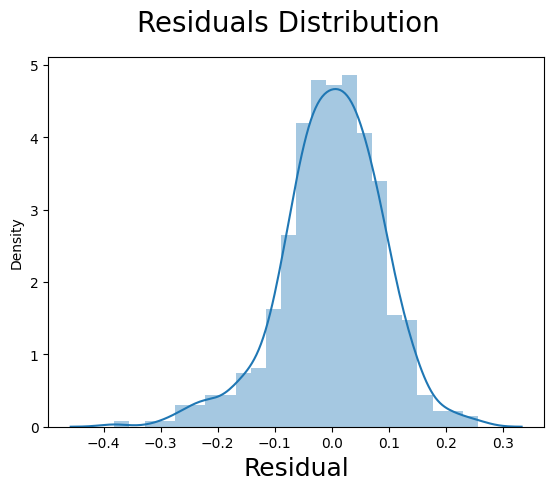

In [78]:
y_train_pred=lm6.predict(x_train_rfe_6_const)
# Ploting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred))
fig.suptitle('Residuals Distribution', fontsize = 20)
plt.xlabel('Residual', fontsize = 18)

Residuals are normally distributed.

Homoscedasticity

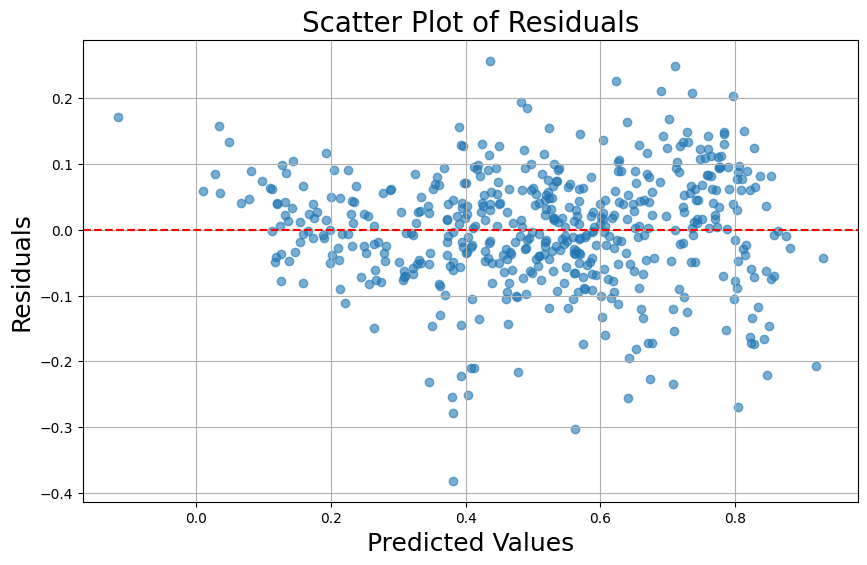

In [79]:
# Calculate the error terms
errors = y_train - y_train_pred

# Create a scatter plot of predicted values vs. errors
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, errors, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.title('Scatter Plot of Residuals', fontsize=20)
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18)
plt.grid(True)
plt.show()

No specific pattern is observed in above plot.

Multicollinearity

In [80]:
calc_vif(x_train_rfe_6)

       Features   VIF
2          temp  4.68
1    workingday  4.12
3     windspeed  4.10
0            yr  1.92
7     weekday_6  1.66
4      season_2  1.58
8  weathersit_2  1.50
5      season_4  1.42
6        mnth_9  1.21
9  weathersit_3  1.10


VIF values for all features are below 5, indicating that there is no multicollinearity.

Linearity

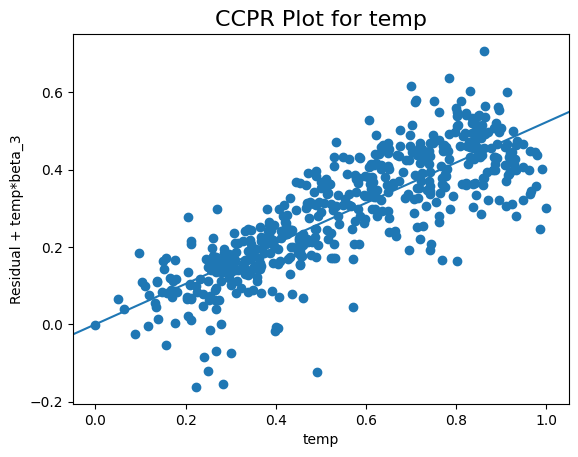

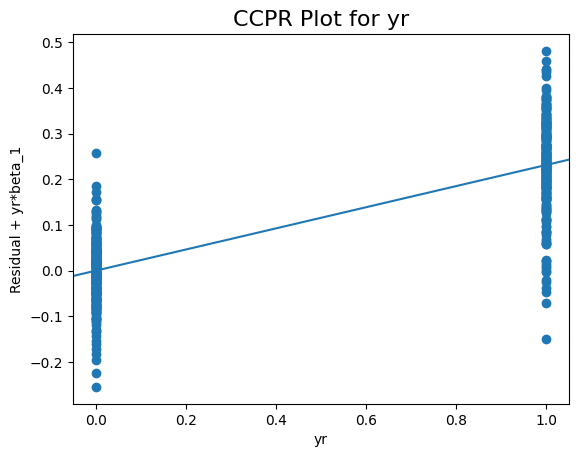

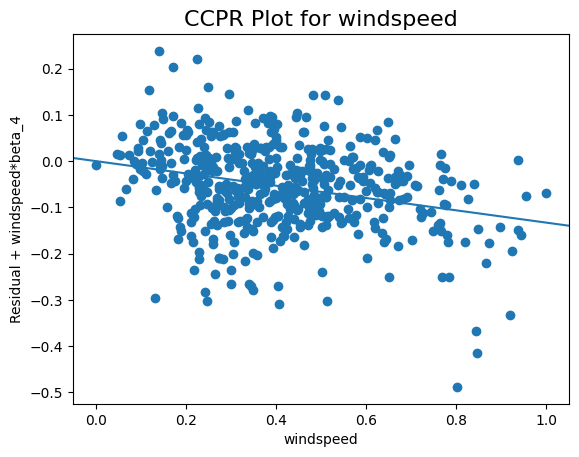

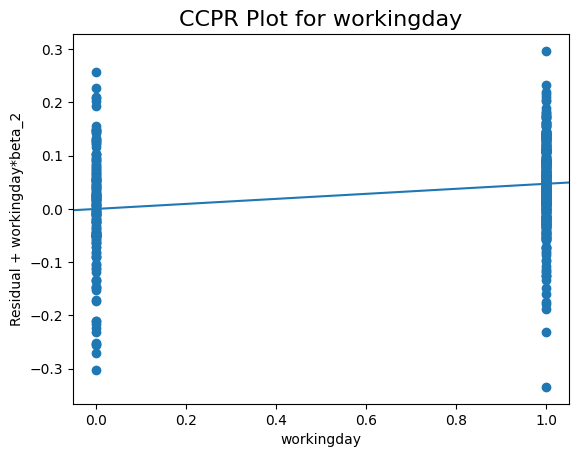

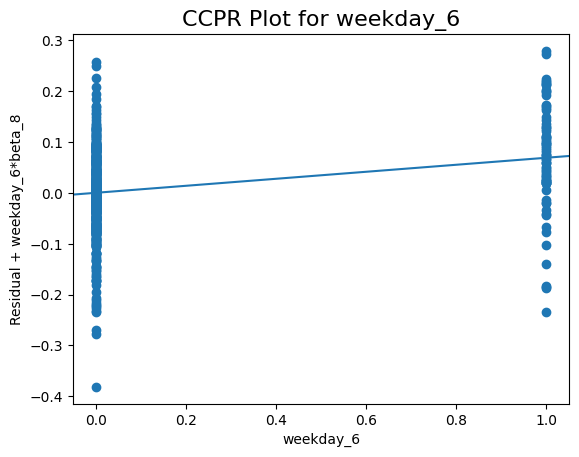

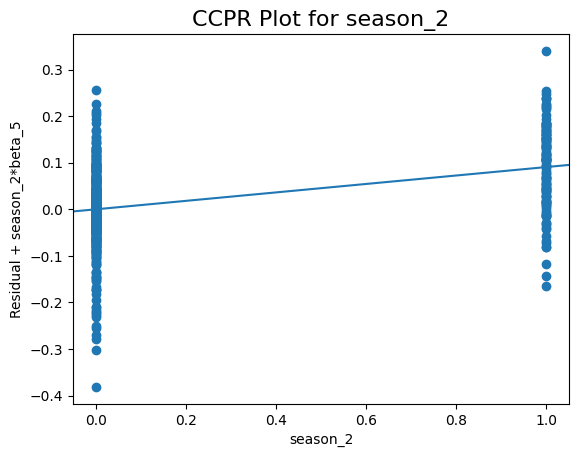

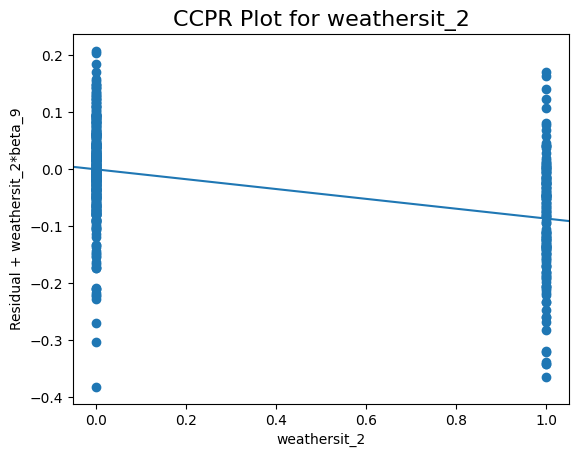

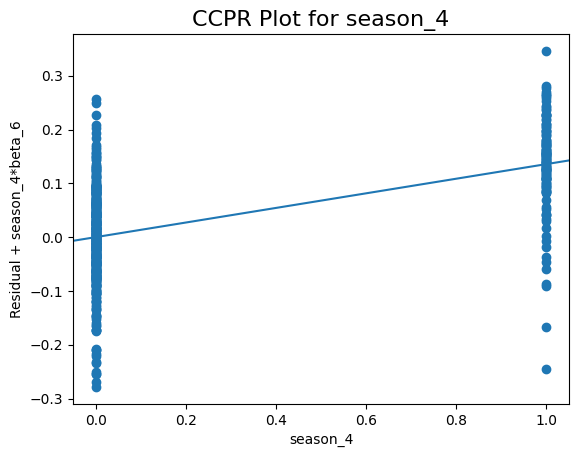

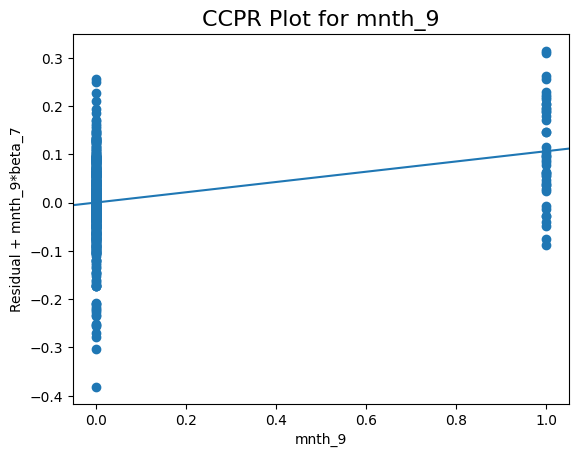

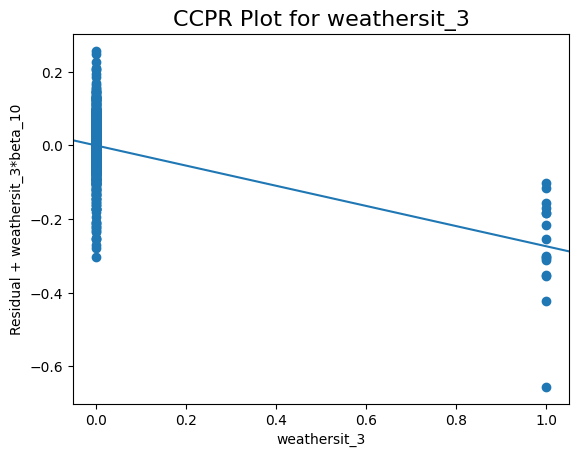

In [81]:
# Linear relationship validation using CCPR (Component and component plus residual) plot

# List of feature variables
features = ['temp', 'yr', 'windspeed', 'workingday', 'weekday_6','season_2','weathersit_2','season_4','mnth_9','weathersit_3']

# Loop over each feature and generate the CCPR plot
for feature in features:
    sm.graphics.plot_ccpr(lm6, feature)
    plt.title(f'CCPR Plot for {feature}', fontsize=16)
    plt.show()

CCPR plots show straight line indicating that there is linear relationship of the target variable with all the feature variables.

# Testing Data

Rescaling test data

In [82]:
df_test[num_columns] = scaler.transform(df_test[num_columns])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
146,0,0,1,0.803235,0.746604,0.673679,0.520759,0.535780,1,0,...,0,0,0,0,0,0,1,0,0,0
263,0,0,1,0.691412,0.630888,0.927436,0.176569,0.498159,0,1,...,0,0,0,0,1,0,0,0,1,0
426,1,0,0,0.458090,0.447507,0.640189,0.330861,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
552,1,0,0,1.035482,0.971286,0.507084,0.336765,0.554303,0,1,...,0,0,0,0,0,0,0,1,0,0
302,0,0,0,0.335515,0.324179,0.642765,0.367929,0.380695,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
y_test=df_test.pop('cnt')
x_test=df_test
print(y_test.shape)
print(x_test.shape)

(219,)
(219, 29)


Filtering the required columns

In [84]:
x_test=x_test[x_train_rfe_6.columns]
x_test.shape

(219, 10)

In [85]:
x_test.head()

,yr,workingday,temp,windspeed,season_2,season_4,mnth_9,weekday_6,weathersit_2,weathersit_3
146,0,1,0.803235,0.520759,1,0,0,0,0,0
263,0,1,0.691412,0.176569,0,0,1,0,1,0
426,1,0,0.458090,0.330861,0,0,0,1,1,0
552,1,0,1.035482,0.336765,0,0,0,1,0,0
302,0,0,0.335515,0.367929,0,1,0,0,0,0


In [86]:
# Adding constant variable to test dataframe
x_test_lm6 = sm.add_constant(x_test)

In [87]:
y_pred = lm6.predict(x_test_lm6)

# Model Evaluation

In [88]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7828371324046333

In [89]:
r2 = r2_score(y_test, y_pred)
round(r2,3)

0.783

In [90]:
p = x_test_lm6.shape[1]  # number of features
n = len(y_test) # number of data points
# Adjusted R-squared formula
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(round(adj_r2, 3))

0.771


Text(0, 0.5, 'y_pred')

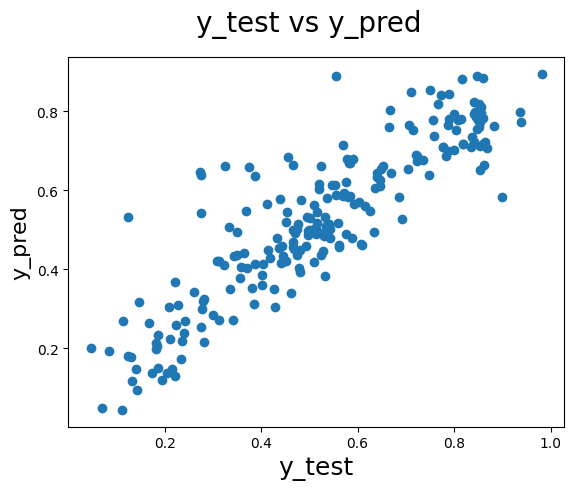

In [91]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

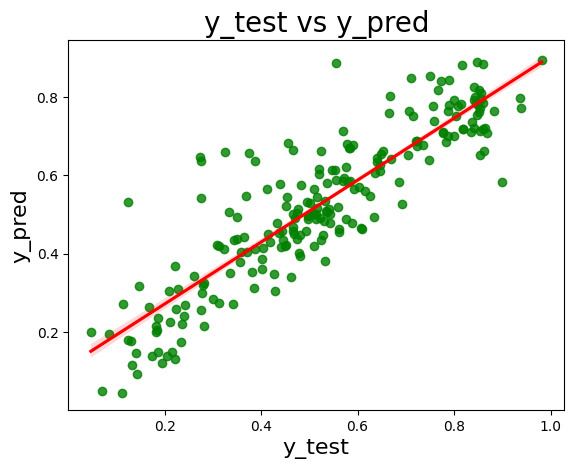

In [92]:
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=16)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Linear Regression Equation

In [93]:
round(lm6.params,4)

,0
const,0.0905
yr,0.2315
workingday,0.0473
temp,0.5232
windspeed,-0.1330
season_2,0.0908
season_4,0.1358
mnth_9,0.1064
weekday_6,0.0690
weathersit_2,-0.0864


**Equation for the best fit line is** :

cnt = 0.0905 + 0.2315(yr) + 0.0473(workingday) + 0.5232(temp) − 0.1330(windspeed) + 0.0908(season_2) + 0.1358(season_4) + 0.1064(mnth_9) + 0.0690(weekday_6) − 0.0864(weathersit_2) − 0.2742(weathersit_3)

# Train Test Model Result Comparison

- Train dataset R^2 = 0.842

- Test dataset R^2 = 0.783

- Train dataset Adjusted R^2 = 0.839

- Test dataset Adjusted R^2 = 0.771

# Conclusion

- The features used in the prediction of the target variable cnt (bike bookings) are:
1. 'temp' (temperature)
2. 'yr' (year)
3. 'windspeed'
4. 'workingday'
5. 'weekday_6'
6. 'season_2' (summer)
7. 'weathersit_2' (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)
8. 'season_4' (winter)
9. 'mnth_9' (September)
10. 'weathersit_3' (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)


- As per the absolute values of the coefficients or weights of the linear regression model, the top 3 features contributing significantly towards the demand of shared bikes are as follows:

1. temp : A one-unit increase in temp leads to 0.5232 increase in bike bookings. This suggests that warmer weather significantly drives bike demand.

2. yr : A unit increase in yr variable increases the bike hirings by 0.2315 units. This reflects a rising trend in demand over time, indicating business growth.


3. weathersit_3 : A unit increase in weathersit_3 which indicates light snow/rain/thunderstorm decreases bike bookings by 0.2742 units. This indicates that adverse weather conditions negatively impact bike demand.

The analysis reveals that bike demand is positively influenced by warmer temperatures and an increasing trend over the years, while adverse weather conditions (snow/rain/thunderstorm) tend to decrease bike bookings.


--------------------------------------------------------------------------------

Season details:

season_2 - summer

season_3 - fall

season_4 - winter



Weather details:

weathersit_2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

weathersit_3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

